# Redes neuronales y máquinas de soporte vectorial
## Predicción del consumo (mpg) de unos vehículos
#### Alumnos:
* Alberto González Isorna
* Federico Damián Estébanez
* José Felipe López Guerra

## Importación de librerías

In [2]:
import io #modulo para realizar distintas operaciones en Python.
import pandas as pd #Librería de análisis de datos.
import matplotlib.pyplot as plt #Libraría de representación de gráficas.
import seaborn as sns #Herramienta de visualización de datos.
import numpy as np #Numpy facilita un largo set de tipos de datos numéricos para construir arrays.
from scipy.stats import norm #Librería con herramientas y algoritmos matemáticos.
from scipy import stats 
from sklearn import svm #Librería con algoritmos de aprendizaje
from sklearn.preprocessing import StandardScaler 
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.neural_network import MLPRegressor
from sklearn.preprocessing import LabelEncoder
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline



## Tratamiento de los datos

### Resumen de los tipos de datos
**Variable dependiente:**
* **mpg**

**Variables independientes:**
* **cylinders**
* **displacement**
* **horsepower**
* **weight**
* **acceleration**
* **model year**
* **origin**
* **car name**


In [3]:
#Read CSV 
car_data = pd.read_csv(
    'auto-mpg.data',
    header=None,
    encoding='utf-8',
    delim_whitespace=True,
    names=['mpg', 'cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'model year', 'origin', 'car name'],
    
)
#Previsualización los datos
display(car_data)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino
5,15.0,8,429.0,198.0,4341.0,10.0,70,1,ford galaxie 500
6,14.0,8,454.0,220.0,4354.0,9.0,70,1,chevrolet impala
7,14.0,8,440.0,215.0,4312.0,8.5,70,1,plymouth fury iii
8,14.0,8,455.0,225.0,4425.0,10.0,70,1,pontiac catalina
9,15.0,8,390.0,190.0,3850.0,8.5,70,1,amc ambassador dpl


In [4]:
#Dimensiones
car_data.shape

(398, 9)

In [5]:
#Comprobación de datos nulos
car_data.isnull().any() #Aparentemente ningún dato nulo

mpg             False
cylinders       False
displacement    False
horsepower      False
weight          False
acceleration    False
model year      False
origin          False
car name        False
dtype: bool

In [6]:
#Chequeo del tipo de los datos
car_data.dtypes

mpg             float64
cylinders         int64
displacement    float64
horsepower       object
weight          float64
acceleration    float64
model year        int64
origin            int64
car name         object
dtype: object

In [7]:
#Codificación de la variable "car name"

# Objeto codificador
le = LabelEncoder()
#Ajustar y transformar el codificador a la columna de "car name"
car_data['car name'] = le.fit_transform(car_data.values[:,8])
display(car_data)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,49
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,36
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,231
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,14
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,161
5,15.0,8,429.0,198.0,4341.0,10.0,70,1,141
6,14.0,8,454.0,220.0,4354.0,9.0,70,1,54
7,14.0,8,440.0,215.0,4312.0,8.5,70,1,223
8,14.0,8,455.0,225.0,4425.0,10.0,70,1,241
9,15.0,8,390.0,190.0,3850.0,8.5,70,1,1


In [8]:
#Lectura de horse power, para identificar a que se debe el atributo de objeto
car_data.horsepower.unique()

array(['130.0', '165.0', '150.0', '140.0', '198.0', '220.0', '215.0',
       '225.0', '190.0', '170.0', '160.0', '95.00', '97.00', '85.00',
       '88.00', '46.00', '87.00', '90.00', '113.0', '200.0', '210.0',
       '193.0', '?', '100.0', '105.0', '175.0', '153.0', '180.0', '110.0',
       '72.00', '86.00', '70.00', '76.00', '65.00', '69.00', '60.00',
       '80.00', '54.00', '208.0', '155.0', '112.0', '92.00', '145.0',
       '137.0', '158.0', '167.0', '94.00', '107.0', '230.0', '49.00',
       '75.00', '91.00', '122.0', '67.00', '83.00', '78.00', '52.00',
       '61.00', '93.00', '148.0', '129.0', '96.00', '71.00', '98.00',
       '115.0', '53.00', '81.00', '79.00', '120.0', '152.0', '102.0',
       '108.0', '68.00', '58.00', '149.0', '89.00', '63.00', '48.00',
       '66.00', '139.0', '103.0', '125.0', '133.0', '138.0', '135.0',
       '142.0', '77.00', '62.00', '132.0', '84.00', '64.00', '74.00',
       '116.0', '82.00'], dtype=object)

In [9]:
#Se debe al símbolo "?"
#Ya que este valor se da en pocas ocasiones, no perdemos gran cantidad de información eliminando la fila
car_data = car_data[car_data.horsepower != '?']
#Comprobación
print('?' in car_data.horsepower) # FALSE
#Dimensiones
car_data.shape
# Se han eliminado 6 filas

False


(392, 9)

In [10]:
# volvemos a chequear el tipo de los datos
car_data.dtypes

mpg             float64
cylinders         int64
displacement    float64
horsepower       object
weight          float64
acceleration    float64
model year        int64
origin            int64
car name          int64
dtype: object

In [11]:
# Conversión de'horsepower' a float
car_data.horsepower = car_data.horsepower.astype('float')
# Comprobación
car_data.dtypes

mpg             float64
cylinders         int64
displacement    float64
horsepower      float64
weight          float64
acceleration    float64
model year        int64
origin            int64
car name          int64
dtype: object

In [12]:
# Descripción de los datos
car_data.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
count,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000
mean,23.445918,5.471939,194.411990,104.469388,2977.584184,15.541327,75.979592,1.576531,148.336735
std,7.805007,1.705783,104.644004,38.491160,849.402560,2.758864,3.683737,0.805518,89.556874
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000,1.000000,0.000000
25%,17.000000,4.000000,105.000000,75.000000,2225.250000,13.775000,73.000000,1.000000,64.750000
50%,22.750000,4.000000,151.000000,93.500000,2803.500000,15.500000,76.000000,1.000000,148.500000
75%,29.000000,8.000000,275.750000,126.000000,3614.750000,17.025000,79.000000,2.000000,225.250000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000,3.000000,304.000000


In [13]:
# Descripción de mpg
car_data.mpg.describe()

count    392.000000
mean      23.445918
std        7.805007
min        9.000000
25%       17.000000
50%       22.750000
75%       29.000000
max       46.600000
Name: mpg, dtype: float64


### Distribución mpg


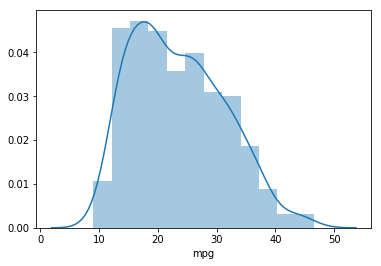

In [14]:

# Análisis de la distribución de mpg
sns.distplot(car_data['mpg'])

El dato de 'mpg' oscila entre 9 y 46.6. Tiene una media de 23.44 con una variación de 7.8.

In [15]:
"""
Comprobamos los valores de asimetría y curtosis (grado de concentración)
  - Asimetría:
    skew = 0, simétrica, approx. misma cantidad de valores a los dos lados de la media
    skew > 0, asimétricamente positiva por lo que los valores se tienden a reunir más en la parte izq
    skew < 0, asimétricamente negativa por lo que los valores se tienden a reunir más en la parte dcha
  - Curtosis:
    kurt = 0, mesocúrtica
    kurt > 0, leptocúrtica
    kurt < 0, platicúrtica
"""
print("Asimetría: %f" % car_data['mpg'].skew())
print("Curtosis: %f" % car_data['mpg'].kurt())

Asimetría: 0.457092
Curtosis: -0.515993


In [16]:
# Declaración de la función para escalar datos
def scale(a):
    b = (a-a.min())/(a.max()-a.min())
    return b




## Datos escalados

In [17]:
#Datos escalados
car_data_scaled = car_data.copy()
car_data_scaled['displacement'] = scale(car_data_scaled['displacement'])
car_data_scaled['horsepower'] = scale(car_data_scaled['horsepower'])
car_data_scaled['acceleration'] = scale(car_data_scaled['acceleration'])
car_data_scaled['weight'] = scale(car_data_scaled['weight'])
car_data_scaled['mpg'] = scale(car_data_scaled['mpg'])
car_data_scaled.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,0.239362,8,0.617571,0.456522,0.536150,0.238095,70,1,49
1,0.159574,8,0.728682,0.646739,0.589736,0.208333,70,1,36
2,0.239362,8,0.645995,0.565217,0.516870,0.178571,70,1,231
3,0.186170,8,0.609819,0.565217,0.516019,0.238095,70,1,14
4,0.212766,8,0.604651,0.510870,0.520556,0.148810,70,1,161


In [18]:
# Chequeamos de las variables de la columna origen
car_data.origin.unique()

array([1, 3, 2])

In [19]:
# Asignación de un país a cada valor de origin en una nueva columna
# (tanto en el original como en el escalado)
car_data_scaled['Country_code'] = car_data.origin.replace([1,2,3],['USA','Europe','Japan'])
car_data_scaled.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name,Country_code
0,0.239362,8,0.617571,0.456522,0.536150,0.238095,70,1,49,USA
1,0.159574,8,0.728682,0.646739,0.589736,0.208333,70,1,36,USA
2,0.239362,8,0.645995,0.565217,0.516870,0.178571,70,1,231,USA
3,0.186170,8,0.609819,0.565217,0.516019,0.238095,70,1,14,USA
4,0.212766,8,0.604651,0.510870,0.520556,0.148810,70,1,161,USA



## mpg por país

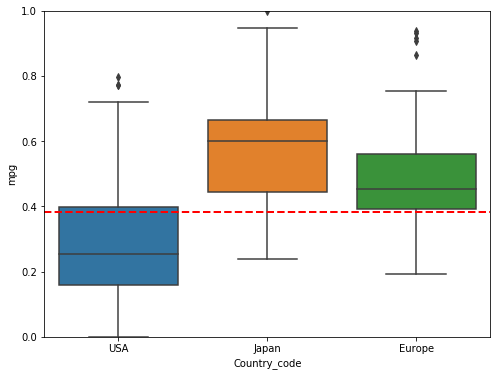

In [20]:
# Visualización de la relación de mpg por países mediante un diagrama de caja
var = 'Country_code'
data_plt = pd.concat([car_data_scaled['mpg'], car_data_scaled[var]], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x=var, y="mpg", data=data_plt)
fig.axis(ymin=0, ymax=1)
plt.axhline(car_data_scaled.mpg.mean(),color='r',linestyle='dashed',linewidth=2)

La línea roja marca la media.
* La mayoría de los coches USA, casi el 75%, tienen mpg por debajo de la media.
* La mayoría de los coches de Japan y Europe tienen mpg por encima de la media.

### mpg por año

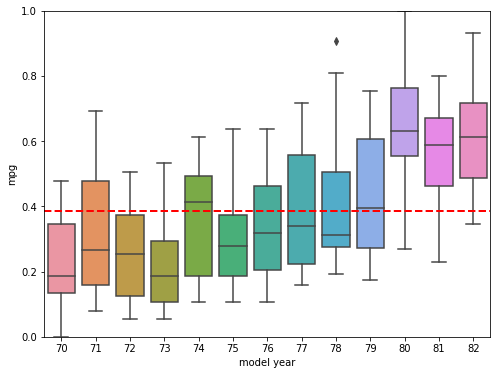

In [21]:
# Distribución de mpg por años
var = 'model year'
data_plt = pd.concat([car_data_scaled['mpg'], car_data_scaled[var]], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x=var, y="mpg", data=data_plt)
fig.axis(ymin=0, ymax=1)
plt.axhline(car_data_scaled.mpg.mean(),color='r',linestyle='dashed',linewidth=2)

### mpg por cilindros

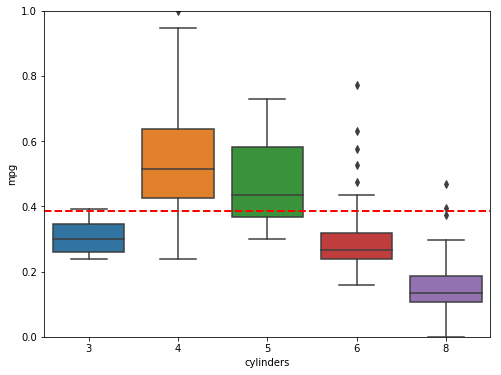

In [22]:
# Distribución por cilindros
var = 'cylinders'
data_plt = pd.concat([car_data_scaled['mpg'], car_data_scaled[var]], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x=var, y="mpg", data=data_plt)
fig.axis(ymin=0, ymax=1)
plt.axhline(car_data_scaled.mpg.mean(),color='r',linestyle='dashed',linewidth=2)

### Relación de las variables con mpg

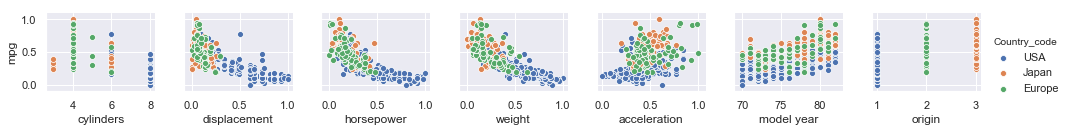

In [23]:
#scatterplot
sns.set()
names=['cylinders',"displacement","horsepower","weight","acceleration","model year","origin"]
sns.pairplot(car_data_scaled, size=2.0, hue='Country_code',x_vars=names,y_vars=["mpg"])
#.pairplot(data,kind='reg',x_vars=names_filtered,y_vars=["mpg"])
plt.show()

Desplazamiento, número de caballos de y peso están relacionadas inversamente con mpg, así como el año directamente

### Variables relacionadas con mpg

#### Desplazamiento

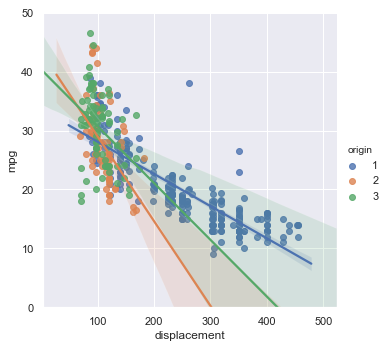

In [24]:
# displacement
var = 'displacement'
plot = sns.lmplot(var,'mpg',data=car_data,hue='origin')
plot.set(ylim = (0,50))

#### Caballos

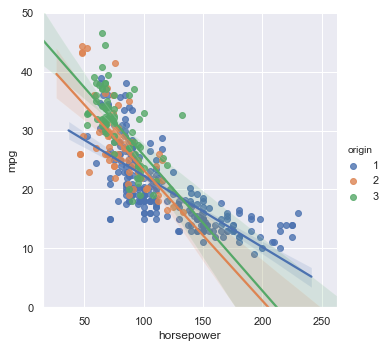

In [25]:
# horsepower
var = 'horsepower'
plot = sns.lmplot(var,'mpg',data=car_data,hue='origin')
plot.set(ylim = (0,50))

#### Peso

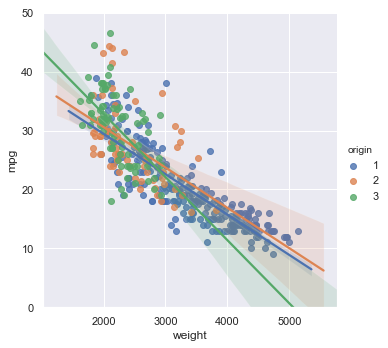

In [26]:
# weight
var = 'weight'
plot = sns.lmplot(var,'mpg',data=car_data,hue='origin')
plot.set(ylim = (0,50))

#### Año

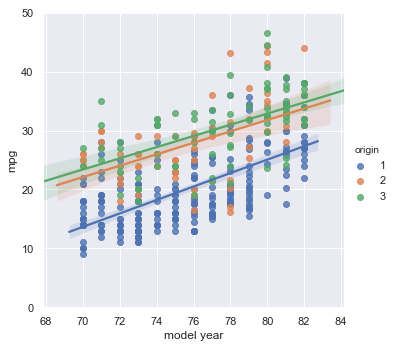

In [27]:
# model year
var = 'model year'
plot = sns.lmplot(var,'mpg',data=car_data,hue='origin')
plot.set(ylim = (0,50))

### Preparación de datos de training y test

Tras hacer varias pruebas y analizar las gráficas, hemos elegido los factores que influyen realmente al consumo para llevar a cabo nuestra regresión, estos son:

*   Desplazamiento (kilometros recorridos) relación inversa
*   Potencia : relación inversa
*   Peso : relación inversa
*   Pais de origen : menos consumo en Japón, seguido de Europa y por último USA
*   Año del modelo : relación directa

Para la separación de datos nos hemos apoyado en el dataframe existente y hemos utilizado la función train_test_split

---

Relación Inversa: a mayor valor de la variable X menos millas por galón de gasolina podemos hacer con el coche

Relación Directa: a menor valor de la variable X menos millas por galón de gasolina podemos hacer con el coche



In [28]:
# Preparación de los datos de training

factors = ['displacement', 'horsepower', 'weight', 'origin', 'model year']
X = pd.DataFrame(car_data[factors].copy())
y = car_data['mpg'].copy()

X = StandardScaler().fit_transform(X) #escalamos los datos de 0 a 1

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)


### Predicción: Máquina de vector de soporte

Una vez hemos separado los datos de entrenamiento y test, procedemos a hacer la predicciones. 

Hemos procedido con una estrategia de regresión ya que nuestro objetivo es predecir que valor que tendrá un coche con unas determinadas caracteristicas no introducirlo en una categoría. 

Dentro del Suport Vector Regresion hemos elegido tres estrategias:


1.   Nucleo Radial (Rbf)
2.   Nucleo Lineal (Linear)
3.   Predicción polinomial (Poly)



RBF: 0.9124853741870398
RBF r2 score: 0.9124853741870398
RBF MSE: 5.4394991216810595
RBF RMSE: 2.3322733805626346
Linear: 0.8332201820138039
Linear r2 score: 0.8332201820138039
Linear MSE: 10.36625209812291
Linear RMSE: 3.219666457588877
Poly: 0.9048044580165465
Poly r2 score: 0.9048044580165466
Poly MSE: 5.9169088846205415
Poly RMSE: 2.432469708880368


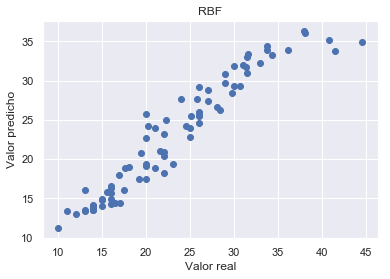

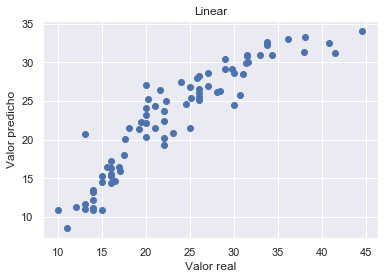

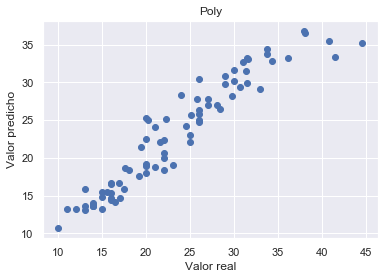

In [29]:
# SVM - Regression

# prediccion rbf
svr_rbf = svm.SVR(kernel='rbf', C=100, gamma=0.1, epsilon=.1)
svr_rbf.fit(X_train, y_train)
svr_rbf_predict = svr_rbf.predict(X_test)

# prediccion lineal
svr_lin = svm.SVR(kernel='linear', C=100, gamma='auto')
svr_lin.fit(X_train, y_train)
svr_lin_predict = svr_lin.predict(X_test)

# predicción polinomial
svr_poly = svm.SVR(kernel='poly', C=100, gamma='auto', degree=3, epsilon=.1, coef0=1)
svr_poly.fit(X_train, y_train)
svr_poly_predict = svr_poly.predict(X_test)

#-------------------------------------

# Graficas prediccion rbf
print('RBF: {}'.format(svr_rbf.score(X_test,y_test)))
print('RBF r2 score: {}'.format(r2_score(y_test, svr_rbf_predict)))
print('RBF MSE: {}'.format(mean_squared_error(y_test, svr_rbf_predict)))
print('RBF RMSE: {}'.format(np.sqrt(mean_squared_error(y_test, svr_rbf_predict))))
fig,ax = plt.subplots()
ax.scatter(y_test, svr_rbf_predict)
ax.set_xlabel('Valor real')
ax.set_ylabel('Valor predicho')
ax.title.set_text('RBF')
fig.show()

# Graficas predicción lineal
print('Linear: {}'.format(svr_lin.score(X_test,y_test)))
print('Linear r2 score: {}'.format(r2_score(y_test, svr_lin_predict)))
print('Linear MSE: {}'.format(mean_squared_error(y_test, svr_lin_predict)))
print('Linear RMSE: {}'.format(np.sqrt(mean_squared_error(y_test, svr_lin_predict))))
fig,ax = plt.subplots()
ax.scatter(y_test, svr_lin_predict)
ax.set_xlabel('Valor real')
ax.set_ylabel('Valor predicho')
ax.title.set_text('Linear')
fig.show()

# Graficas predicción polinomial
print('Poly: {}'.format(svr_poly.score(X_test,y_test)))
print('Poly r2 score: {}'.format(r2_score(y_test, svr_poly_predict)))
print('Poly MSE: {}'.format(mean_squared_error(y_test, svr_poly_predict)))
print('Poly RMSE: {}'.format(np.sqrt(mean_squared_error(y_test, svr_poly_predict))))
fig,ax = plt.subplots()
ax.scatter(y_test, svr_poly_predict)
ax.set_xlabel('Valor real')
ax.set_ylabel('Valor predicho')
ax.title.set_text('Poly')
fig.show()

Vemos como en general obtenemos buenos resultados con los tres algoritmos. 

Dado que los datos no son totalmente lineales si no que algunos tienen una ligera tendencia exponencial el ajuste polinomico o el radial nos aportan los mejores resultados con un RMSE de entorno al 2.5 y precisiones del 90%



### Predicción: Red neuronal

El procedimiento de la red neuronal respecto al la SVM es totalmente distinto. La filosofía en este caso es primero crear la estructura de la red neuronal y posteriormente gracias a la propagación inversa ajustar los pesos que obtienen los mejores resultados. 

Hemos probado distintas estrcuturas y posibilidades, aquella que mas adecuada nos ha parecido ha sido la siguiente:

MLPRegressor: 0.9071646795188888
MLPRegressor r2 score: 0.9071646795188887
MLPRegressor MSE: 5.770208574018737
MLPRegressor RMSE: 2.40212584475059


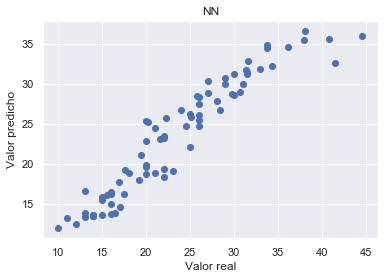

In [30]:
# Neural network - Regression

# Layers -> 10 
# Activation function ->  ReLU (Rectified Linear Unit)
# Max iteratioons -> 1000

nn = MLPRegressor(
    hidden_layer_sizes=(10,),  activation='relu', solver='adam', alpha=0.001, batch_size='auto',
    learning_rate='constant', learning_rate_init=0.01, power_t=0.5, max_iter=1000, shuffle=True,
    random_state=9, tol=0.0001, verbose=False, warm_start=False, momentum=0.9, nesterovs_momentum=True,
    early_stopping=False, validation_fraction=0.1, beta_1=0.9, beta_2=0.999, epsilon=1e-08)
n = nn.fit(X_train, y_train)

#predecimos los datos
nn_predict = nn.predict(X_test)

# Imprimimos los datos y resultados
print('MLPRegressor: {}'.format(nn.score(X_test,y_test)))
from sklearn.metrics import r2_score
print('MLPRegressor r2 score: {}'.format(r2_score(y_test, nn_predict)))
print('MLPRegressor MSE: {}'.format(mean_squared_error(y_test, nn_predict)))
print('MLPRegressor RMSE: {}'.format(np.sqrt(mean_squared_error(y_test, nn_predict))))
fig,ax = plt.subplots()
ax.scatter(y_test, nn_predict)
ax.set_xlabel('Valor real')
ax.set_ylabel('Valor predicho')
ax.title.set_text('NN')
fig.show()

Vemos como obtenemos resultados muy similares a los mejores datos obtenidos con el SVM, precisión del 90% y RSME de 2.4. 

Como ventaja la red neuronal requiere menos ajuste que los métodos utilizados previamente, ya que iteración trás iteración, aprende y mejora sus propios resultados. 

